# Topic Modeling with SciKit Learn &mdash; Experimental

In this notebook we create a topic model from our corpus  using SciKit Learn's library. We'll save our results and then use another notebook to explore the results.

Experimental, i.e. wrap topic modeling functions.

# Set Up

## Imports

In [8]:
import pandas as pd
import numpy as np
from lib import tapi

## Configuration

### Show and pick a corpus to work with

In [9]:
tapi.list_corpora()

['airbnb',
 'anphoblacht',
 'arxiv',
 'covid19',
 'jstor_hyperparameter',
 'novels',
 'okcupid',
 'tamilnet',
 'winereviews',
 'yelp',
 'zuboff']

In [10]:
# data_prefix = 'winereviews'
data_prefix = 'tamilnet'

## Parameters

In [11]:
n_terms = 4000        # Vocabulary size
ngram_range = (1,4)   # ngram min and max lengths
n_topics = 20         # Number of topics
max_iter = 5          # Number of iterations for topic model

## Create Tables Object

These tables constitute a "digital critical edition."

In [12]:
db = tapi.Edition(data_prefix)

# Import Corpus Data

We import a corpus in our standard format

In [13]:
corpus = db.get_corpus()

## Inspect contents

In [14]:
corpus.head(10)

,doc_key,doc_title,doc_uri,doc_label,doc_ord,doc_content,doc_original,doc_year,doc_date,doc_citation
doc_id,,,,,,,,,,
0,19631,Speaker urged to ensure protection to parliame...,https://www.tamilnet.com/art.html?catid=13&art...,2007,2007,anura bandaranaike minister for national heri...,<h1>Speaker urged to ensure protection to parl...,NaN,NaN,NaN
1,16455,Youth shot at Valaichenai Church,https://www.tamilnet.com/art.html?catid=13&art...,2006,2006,two motorbike riding gunmen shot and wounded ...,<h1>Youth shot at Valaichenai Church </h1> [Ta...,NaN,NaN,NaN
2,13890,Token fast held in Trinco in support of aid deal,https://www.tamilnet.com/art.html?catid=13&art...,2005,2005,one-day token fast was held in trincomalee to...,<h1>Token fast held in Trinco in support of ai...,NaN,NaN,NaN
3,15106,"World concerned over escalation of violence, S...",https://www.tamilnet.com/art.html?catid=13&art...,2005,2005,the global community is gravely concerned ove...,<h1>World concerned over escalation of violenc...,NaN,NaN,NaN
4,26524,United Sri Lanka is the steadfast aim of UNP ...,https://www.tamilnet.com/art.html?catid=13&art...,2009,2009,general secretary of united national party un...,<h1>United Sri Lanka is the steadfast aim of U...,NaN,NaN,NaN
5,1428,UN official calls for end to war,https://www.tamilnet.com/art.html?catid=13&art...,1998,1998,the un special representative on children in ...,<h1>UN official calls for end to war </h1> [Ta...,NaN,NaN,NaN
6,14822,Paramilitary cadres abduct 3 youths in Batticaloa,https://www.tamilnet.com/art.html?catid=13&art...,2005,2005,armed men believed to be the cadres of the pa...,<h1>Paramilitary cadres abduct 3 youths in Bat...,NaN,NaN,NaN
7,4198,Soldier killed in firefight,https://www.tamilnet.com/art.html?catid=13&art...,1999,1999,a soldiers was killed when members of the lib...,<h1>Soldier killed in firefight </h1> [TamilNe...,NaN,NaN,NaN
8,31955,Badurdeen squad threatens Tamil newspaper edit...,https://www.tamilnet.com/art.html?catid=13&art...,2014,2014,a squad led by upfa provincial councillor fro...,<h1>Badurdeen squad threatens Tamil newspaper ...,NaN,NaN,NaN


In [15]:
corpus.shape

(10000, 10)

In [16]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   doc_key       10000 non-null  int64  
 1   doc_title     10000 non-null  object 
 2   doc_uri       10000 non-null  object 
 3   doc_label     10000 non-null  int64  
 4   doc_ord       10000 non-null  int64  
 5   doc_content   10000 non-null  object 
 6   doc_original  10000 non-null  object 
 7   doc_year      0 non-null      float64
 8   doc_date      0 non-null      float64
 9   doc_citation  0 non-null      float64
dtypes: float64(3), int64(3), object(4)
memory usage: 781.4+ KB


# Create Bag-of-Words 

ie. a __Count Vector Space__

We use Scikit Learn's CountVectorizer to convert our F1 corpus of paragraphs into a document-term vector space of word counts.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [18]:
count_engine = CountVectorizer(max_features=n_terms, stop_words='english', ngram_range=ngram_range)
count_model = count_engine.fit_transform(corpus.doc_content)

In [9]:
# corpus.doc_content

## Get Generated VOCAB

In [19]:
db.VOCAB = pd.DataFrame(count_engine.get_feature_names(), columns=['term_str'])
db.VOCAB = db.VOCAB.set_index('term_str')
db.VOCAB['ngram_len'] = None # To be added later
# VOCAB.index.name = 'term_id' # For convenience, we'll use strings for IDs

In [23]:
db.VOCAB.sample(10)

,ngram_len
term_str,
gewürztraminer,None
green olive,None
cherries raspberries,None
blush,None
savory,None
juicy palate,None
fresh aftertaste,None
considering,None
prominent,None


## Get Generated BOW

We do this just to show what the counter vectorizer produced. `DTM` stands for documet-term matrix. We convert this sparse matrix into a "thin" dataframe that keeps only terms with counts for each document. 

In [24]:
db.DTM = pd.DataFrame(count_model.toarray(), index=corpus.index, columns=db.VOCAB.index)
db.BOW = db.DTM.stack().to_frame('n')
db.BOW = db.BOW[~(db.BOW.n == 0)]

In [30]:
# db.BOW.head(10)

In [15]:
db.DTM.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 4000 entries, 000 to zippy acidity
dtypes: int64(4000)
memory usage: 305.2 MB


In [16]:
db.BOW.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 267755 entries, (0, 'accented') to (9999, 'wine')
Columns: 1 entries, n to n
dtypes: int64(1)
memory usage: 3.3+ MB


## Compute TF-IDF

In [31]:
tfidf_engine = TfidfTransformer()
tfidf_model = tfidf_engine.fit_transform(count_model)

In [32]:
db.TFIDF = pd.DataFrame(tfidf_model.toarray(), index=corpus.index, columns=db.VOCAB.index)

In [33]:
db.BOW['tfidf'] = db.TFIDF.stack()

In [34]:
db.BOW

n     tfidf
doc_id term_str                
0      accented     1  0.212521
       astringent   1  0.219259
       barrel       1  0.183510
       bit          1  0.164003
       bottle       1  0.198999
...                ..       ...
9999   showing      1  0.160109
       stone        1  0.161591
       stone fruit  1  0.177589
       texture      1  0.118262
       wine         1  0.059593

[267755 rows x 2 columns]

## Add Features to VOCAB

In [36]:
db.VOCAB['ngram_len'] = db.VOCAB.apply(lambda x: len(x.name.split()), 1)
db.VOCAB['n'] = db.DTM.sum()
db.VOCAB['tfidf_mean'] = db.TFIDF.mean()

In [37]:
db.VOCAB

,ngram_len,n,tfidf_mean
term_str,,,
000,1,20,0.000502
000 cases,2,14,0.000366
10,1,141,0.002449
10 merlot,2,14,0.000324
10 years,2,30,0.000687
...,...,...,...
zin,1,59,0.001335
zinfandel,1,89,0.001958
zingy,1,19,0.000526


<AxesSubplot:>

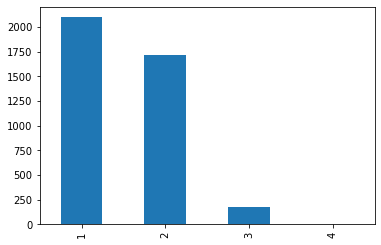

In [41]:
db.VOCAB.ngram_len.value_counts().plot.bar()

# Generate Topic Models

We run Scikit Learn's [LatentDirichletAllocation algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and extract the THETA and PHI tables.

In [46]:
from sklearn.decomposition import LatentDirichletAllocation as LDA, NMF

## Using LDA

In [47]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

### THETA

In [48]:
db.THETA = pd.DataFrame(lda_engine.fit_transform(count_model), index=corpus.index)
db.THETA.index.name = 'doc_id'
db.THETA.columns.name = 'topic_id'

In [50]:
db.THETA.sample(20).T.style.background_gradient()

doc_id,3693,3105,7358,5769,6203,9459,7544,1399,8532,8341,6399,7845,6728,8138,7900,8710,7954,6424,2429,6471
topic_id,,,,,,,,,,,,,,,,,,,,
0,0.001786,0.001923,0.001613,0.001613,0.001724,0.001429,0.002000,0.001087,0.001136,0.001667,0.001786,0.001786,0.001389,0.001563,0.150329,0.002632,0.001471,0.001613,0.002273,0.002174
1,0.001786,0.001923,0.001613,0.001613,0.001724,0.001429,0.002000,0.001087,0.001136,0.001667,0.001786,0.001786,0.001389,0.001563,0.002083,0.002632,0.001471,0.001613,0.002273,0.002174
2,0.001786,0.054273,0.001613,0.001613,0.001724,0.001429,0.002000,0.001087,0.001136,0.164852,0.001786,0.001786,0.200246,0.001563,0.002083,0.002632,0.133973,0.001613,0.002273,0.002174
3,0.113275,0.911112,0.001613,0.100104,0.001724,0.001429,0.002000,0.001087,0.001136,0.001667,0.001786,0.635632,0.001389,0.001563,0.002083,0.002632,0.001471,0.205190,0.002273,0.845107
4,0.001786,0.001923,0.438488,0.001613,0.001724,0.001429,0.002000,0.001087,0.001136,0.001667,0.001786,0.332225,0.001389,0.001563,0.002083,0.824491,0.001471,0.001613,0.002273,0.002174
5,0.001786,0.001923,0.001613,0.001613,0.001724,0.001429,0.002000,0.001087,0.001136,0.001667,0.001786,0.001786,0.001389,0.001563,0.002083,0.002632,0.001471,0.001613,0.002273,0.002174
6,0.001786,0.001923,0.001613,0.001613,0.001724,0.001429,0.700264,0.907680,0.001136,0.001667,0.001786,0.001786,0.097547,0.001563,0.002083,0.002632,0.001471,0.001613,0.002273,0.002174
7,0.001786,0.001923,0.001613,0.001613,0.001724,0.001429,0.002000,0.001087,0.319040,0.001667,0.001786,0.001786,0.001389,0.001563,0.002083,0.002632,0.001471,0.001613,0.002273,0.002174
8,0.122880,0.001923,0.001613,0.001613,0.001724,0.290947,0.002000,0.001087,0.001136,0.001667,0.001786,0.001786,0.001389,0.001563,0.002083,0.002632,0.288847,0.001613,0.002273,0.002174


### PHI

In [51]:
db.PHI = pd.DataFrame(lda_engine.components_, columns=db.VOCAB.index)
db.PHI.index.name = 'topic_id'
db.PHI.columns.name  = 'term_str'

In [52]:
db.PHI.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
term_str,,,,,,,,,,,,,,,,,,,,
000,0.099775,0.050000,0.050000,1.050000,0.131313,0.050000,0.050000,0.050000,0.050000,0.050000,17.609169,0.050000,0.050000,0.050000,0.050000,0.050000,0.050046,1.050000,0.050000,0.359698
000 cases,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,13.651660,0.050000,0.050000,0.050000,0.050000,0.050000,0.050111,0.050000,0.050000,0.448229
10,3.022868,6.050108,0.086162,12.000268,2.211543,0.101013,22.331032,1.045292,10.185422,1.160380,0.050408,1.294196,30.289550,39.210270,2.655304,0.616758,0.050000,0.050000,5.396295,4.193130
10 merlot,0.050000,0.050000,0.050000,0.074871,0.050000,0.050000,3.677772,0.050000,0.050000,0.050000,0.060776,0.050010,10.148418,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.288153
10 years,0.050000,0.050028,0.246771,4.402638,0.050000,0.050000,0.239903,0.050000,9.034005,0.050000,0.050000,0.050000,0.050000,9.282589,0.714246,0.050000,0.050000,0.050000,6.429821,0.050000


### Create Topic Glosses

In [53]:
n_top_words = 7

In [54]:
db.TOPICS = db.PHI.stack()\
    .to_frame('weight')\
    .groupby('topic_id')\
    .apply(lambda x: x.weight.sort_values(ascending=False)\
               .head(n_top_words)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

In [55]:
db.TOPICS

term_str,0,1,2,3,4,5,6
topic_id,,,,,,,
0,nose,fruit,palate,shows,bottling,aromas,flavors
1,fruit,wine,flavors,stone,stone fruit,aromas,blend
2,ripe,acidity,fruit,wine,bright,flavors,drink
3,wine,drink,acidity,fruits,ripe,tannins,fruit
4,flavors,acidity,wine,finish,peach,lemon,palate
5,wine,fruit,acidity,blanc,flavors,texture,sauvignon blanc
6,palate,cherry,tannins,black,aromas,alongside,offers
7,fruit,flavors,finish,wine,black,fruit flavors,oak
8,wine,tannins,black,plum,flavors,berry,blackberry


In [56]:
db.TOPICS['topwords'] = db.TOPICS.apply(lambda x: str(x.name) + ' ' + ', '.join(x), 1)

In [57]:
db.TOPICS

term_str,0,1,2,3,4,5,6,topwords
topic_id,,,,,,,,
0,nose,fruit,palate,shows,bottling,aromas,flavors,"0 nose, fruit, palate, shows, bottling, aromas..."
1,fruit,wine,flavors,stone,stone fruit,aromas,blend,"1 fruit, wine, flavors, stone, stone fruit, ar..."
2,ripe,acidity,fruit,wine,bright,flavors,drink,"2 ripe, acidity, fruit, wine, bright, flavors,..."
3,wine,drink,acidity,fruits,ripe,tannins,fruit,"3 wine, drink, acidity, fruits, ripe, tannins,..."
4,flavors,acidity,wine,finish,peach,lemon,palate,"4 flavors, acidity, wine, finish, peach, lemon..."
5,wine,fruit,acidity,blanc,flavors,texture,sauvignon blanc,"5 wine, fruit, acidity, blanc, flavors, textur..."
6,palate,cherry,tannins,black,aromas,alongside,offers,"6 palate, cherry, tannins, black, aromas, alon..."
7,fruit,flavors,finish,wine,black,fruit flavors,oak,"7 fruit, flavors, finish, wine, black, fruit f..."
8,wine,tannins,black,plum,flavors,berry,blackberry,"8 wine, tannins, black, plum, flavors, berry, ..."


### Add Doc Weights

In [58]:
db.TOPICS['doc_weight_sum'] = db.THETA.sum()

In [59]:
db.TOPICS.iloc[:, 7:].sort_values('doc_weight_sum', ascending=False).style.bar()

term_str,topwords,doc_weight_sum
topic_id,,
3,"3 wine, drink, acidity, fruits, ripe, tannins, fruit",1328.340014
4,"4 flavors, acidity, wine, finish, peach, lemon, palate",1090.538970
19,"19 flavors, finish, aromas, berry, palate, plum, oak",709.035556
14,"14 cherry, flavors, wine, pinot, aromas, black, noir",607.757173
18,"18 wine, flavors, ripe, tannins, rich, fruit, drink",578.143584
15,"15 apple, palate, finish, citrus, aromas, green, fresh",562.286731
13,"13 wine, fruit, oak, cabernet, blend, tannins, black",555.768099
6,"6 palate, cherry, tannins, black, aromas, alongside, offers",538.424108
9,"9 fruit, aromas, palate, wine, white, finish, red",434.146039


## Using NMF

In [60]:
nmf_engine = NMF(n_components=n_topics, init='nndsvd', random_state=1, alpha=.1, l1_ratio=.5)

### THETA

In [61]:
db.THETA_NMF = pd.DataFrame(nmf_engine.fit_transform(tfidf_model), index=corpus.index)
db.THETA_NMF.columns.name = 'topic_id'

In [62]:
db.THETA_NMF.sample(20).style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
doc_id,,,,,,,,,,,,,,,,,,,,
6222,0.000000,0.027970,0.000000,0.067504,0.000000,0.026359,0.000000,0.000000,0.000000,0.000000,0.014438,0.000000,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000,0.005279,0.000000,0.043881,0.028309,0.000000,0.000000,0.000000,0.000000,0.003769,0.000000,0.045682
9920,0.009272,0.002182,0.003596,0.000000,0.000000,0.000000,0.000967,0.000000,0.000000,0.002223,0.014905,0.024385,0.000000,0.000000,0.047268,0.010753,0.000000,0.000000,0.000000,0.000000
6624,0.000000,0.015040,0.005870,0.000471,0.000000,0.000000,0.013363,0.000841,0.010523,0.000000,0.000000,0.019304,0.000000,0.000000,0.000000,0.000000,0.000000,0.020866,0.000000,0.000000
2915,0.000000,0.000000,0.022152,0.001675,0.000000,0.000000,0.000000,0.000000,0.000000,0.002124,0.000000,0.034667,0.000000,0.000000,0.000000,0.000000,0.000000,0.018693,0.000000,0.000000
886,0.047161,0.001389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003267,0.002446,0.000000,0.000000,0.000000,0.000000,0.003422,0.000000,0.000000,0.001389,0.000000
4223,0.000158,0.000000,0.005789,0.003831,0.000000,0.019666,0.000000,0.000000,0.000000,0.002954,0.000000,0.011989,0.088798,0.000000,0.000000,0.000000,0.000692,0.000000,0.000000,0.000000
5811,0.000000,0.000000,0.000000,0.003640,0.000000,0.000000,0.065356,0.000000,0.000000,0.000000,0.050851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5105,0.000000,0.000000,0.000000,0.060517,0.000000,0.000000,0.006525,0.000000,0.000000,0.004979,0.000000,0.000000,0.034266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### PHI

In [63]:
db.PHI_NMF = pd.DataFrame(nmf_engine.components_, columns=db.VOCAB.index)

In [64]:
db.PHI_NMF.index.name = 'topic_id'
db.PHI_NMF.columns.name = 'term_str'

In [65]:
db.PHI_NMF.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
term_str,,,,,,,,,,,,,,,,,,,,
000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
000 cases,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.043333,0.000000,0.000000,0.055016,0.160916,0.000000,0.000000,0.022803,0.000000,0.000000,0.000000,0.000000,0.017203,0.000000,0.000000,0.007809,0.024557,0.000000,0.000000,0.000000
10 merlot,0.000000,0.000000,0.000000,0.004434,0.036964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10 years,0.023723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044730,0.000000,0.000000,0.000000


### Topics

In [66]:
db.TOPICS_NMF = db.PHI_NMF.stack()\
    .to_frame('weight')\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(n_top_words)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

In [67]:
db.TOPICS_NMF

term_str,0,1,2,3,4,5,6
topic_id,,,,,,,
0,wine,fruits,ripe,rich,drink,tannins,wood
1,crisp,light,acidity,fresh,bright,wine,fruity
2,lemon,lime,lemon lime,grapefruit,zest,riesling,orange
3,tannins,alongside,palate,aromas,cherry,offers,palate offers
4,cabernet,sauvignon,cabernet sauvignon,blend,merlot,franc,cabernet franc
5,red,red berry,red cherry,red fruit,red fruits,berry,red currant
6,berry,finish,plum,flavors,aromas,herbal,feels
7,black,black cherry,cherry,pepper,black pepper,blackberry,currant
8,fruit,fruit flavors,flavors,tropical fruit,black fruit,tropical,aromas


In [68]:
db.TOPICS_NMF['topwords'] = db.TOPICS_NMF.apply(lambda x: str(x.name) + ' ' + ', '.join(x), 1)

### Add Doc Weights

In [69]:
db.TOPICS_NMF['doc_weight_sum'] = db.THETA_NMF.sum()

In [70]:
db.TOPICS_NMF.iloc[:, 7:].sort_values('doc_weight_sum', ascending=False).style.bar()

term_str,topwords,doc_weight_sum
topic_id,,
0,"0 wine, fruits, ripe, rich, drink, tannins, wood",89.181919
6,"6 berry, finish, plum, flavors, aromas, herbal, feels",70.376952
3,"3 tannins, alongside, palate, aromas, cherry, offers, palate offers",67.308991
1,"1 crisp, light, acidity, fresh, bright, wine, fruity",65.148885
11,"11 nose, palate, notes, nose palate, finish, shows, bottling",64.259420
9,"9 sweet, flavors, vanilla, like, pineapple, honey, soft",60.523884
7,"7 black, black cherry, cherry, pepper, black pepper, blackberry, currant",57.334993
8,"8 fruit, fruit flavors, flavors, tropical fruit, black fruit, tropical, aromas",55.332295
15,"15 white, peach, white peach, stone, flower, citrus, stone fruit",49.729342


# Save the Model

## Keep Corpus Label Info

This is effectively the LIB table.

In [71]:
db.LABELS = corpus[set(corpus.columns.tolist()) - set(['doc_key', 'doc_content', 'doc_original'])]

## Save each dataframe

This could of course be generalized as a function or class method.

In [72]:
db.save_tables()

In [47]:
!ls -l ./db/{data_prefix}*.csv

-rw-r--r--@ 1 rca2t1  staff   9347007 Jun 13 20:54 ./db/winereviews-BOW.csv
-rw-r--r--@ 1 rca2t1  staff  80091190 Jun 13 20:55 ./db/winereviews-DTM.csv
-rw-r--r--@ 1 rca2t1  staff   1832690 Jun 13 20:54 ./db/winereviews-LABELS.csv
-rw-r--r--@ 1 rca2t1  staff   1387059 Jun 13 20:55 ./db/winereviews-PHI.csv
-rw-r--r--@ 1 rca2t1  staff    544306 Jun 13 20:55 ./db/winereviews-PHI_NMF.csv
-rw-r--r--@ 1 rca2t1  staff   4322057 Jun 13 20:55 ./db/winereviews-THETA.csv
-rw-r--r--@ 1 rca2t1  staff   1967524 Jun 13 20:55 ./db/winereviews-THETA_NMF.csv
-rw-r--r--@ 1 rca2t1  staff      2611 Jun 13 20:54 ./db/winereviews-TOPICS.csv
-rw-r--r--@ 1 rca2t1  staff      3015 Jun 13 20:55 ./db/winereviews-TOPICS_NMF.csv
-rw-r--r--@ 1 rca2t1  staff    150779 Jun 13 20:54 ./db/winereviews-VOCAB.csv
